In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [51]:
# import danych
d1 = pd.read_csv("tab1.csv")
d2 = pd.read_csv("tab2.csv", decimal=',')
# /wyczyścimy
d2.loc[:, 'warunek'] = d2.warunek.replace({'nie ': 'nie'})

In [52]:
d1.head()

,id_osoby,id,kategoria,wynik
0,1,1,strukturalna,0
1,1,2,fonemiczna,0
2,1,3,semantyczna,2
3,1,4,ja,5
4,1,5,fonemiczna_pyt,0


In [53]:
d.kategoria.value_counts()

semantyczna_pyt    32
strukturalna       32
fonemiczna         32
fonemiczna_pyt     32
ja                 32
semantyczna        32
Name: kategoria, dtype: int64

# Najpierw pierwsza tabela - wpływ kategorii na pamięć

# Średnie i odchylenia

In [54]:
gr = d1.groupby(['kategoria'])

#### Średnie w grupach:

In [55]:
round(gr.wynik.mean(), 2)

kategoria
fonemiczna         0.41
fonemiczna_pyt     1.56
ja                 4.94
semantyczna        1.03
semantyczna_pyt    1.53
strukturalna       1.47
Name: wynik, dtype: float64

#### Odchylenia standardowe:

In [56]:
round(gr.wynik.std(), 2)

kategoria
fonemiczna         0.71
fonemiczna_pyt     1.08
ja                 1.93
semantyczna        1.09
semantyczna_pyt    1.22
strukturalna       1.39
Name: wynik, dtype: float64

# Boxplot

Poniżej wykres gotowy do wklejenia do artykułu. Plik png w wysokiej rozdzielczości w załączniku.

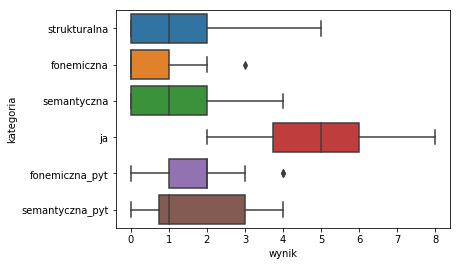

In [57]:
sns.boxplot(x=d.wynik, y=d.kategoria)
plt.savefig('boxplot.png', dpi=150)

Piękny efekt odeniesienia do ja BTW:)

# Analiza wariancji (ANOVA)

Jednoczynnikowa analiza wariancji odpowiada nam na pytanie, czy istnieją istotne statystycznie różnice pomiędzy średnimi. W tym przypadku istnieją, na poziomie istotności p < 0,001 (czyli możemy stwierdzić, że stwierdzone w waszym badaniu różnice wystepują w populacji z prawdopodobieństwem większym niż 99,9%). Opisując wyniki należy po podaniu wartości śrendnich i odchyleń standardowych napisać coś takiego (oczywiście uzupełnijcie ZZ i ZN).

> Jednoczynnikowa analiza wariancji z powtarzanym pomiarem wykazała istotny wpływ ZN na ZZ, F(5,155) = 48,049, p < 0,001.

In [58]:
from statsmodels.stats.anova import AnovaRM
aovrm = AnovaRM(d, 'wynik', 'id_osoby', within=['kategoria'], aggregate_func='mean')
res = aovrm.fit()

print(res)

                 Anova
          Num DF  Den DF  F Value Pr > F
----------------------------------------
kategoria 5.0000 155.0000 48.0489 0.0000



# Wielokrotne porównania (testy _post-hoc_ Tukey HSD)

Skoro już wiemy, że jest istotna różnica pomiędzy średnimi, musimy odpowiedzieć na pytanie **które** dokładnie pary średnich są różne od siebie. Do tego służy poniższa tabela. W pierszych dwóch kolumnach mamy informację o tym, które grupy ze sobą są porównywane. `meandiff` oznacza różnice pomiędzy średnimi. W ostatniej kolumnie (`reject`) jest informacja o istotności róznicy - jeśli `True` to różnica jest istotna statystycznie, jeśli `False` to nie jest. Opis tej procedury w wynikach powinien wyglądać jakoś tak:

> Testy _post-hoc_ wykazały istotne różnice (p < 0,05) pomiędzy warunkiem XXX a YYY, XXX a ZZZ oraz ZZZ a ŹŹŹ. Nie stwierdzono istotnych różnic pomiędzy warunkiem YYY a ZZZ.

In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(d['wynik'], d['kategoria'])
mc_results = mc.tukeyhsd()

In [60]:
print(mc_results)

       Multiple Comparison of Means - Tukey HSD,FWER=0.05      
     group1          group2     meandiff  lower   upper  reject
---------------------------------------------------------------
   fonemiczna    fonemiczna_pyt  1.1562   0.2263  2.0862  True 
   fonemiczna          ja        4.5312   3.6013  5.4612  True 
   fonemiczna     semantyczna    0.625    -0.305  1.555  False 
   fonemiczna   semantyczna_pyt  1.125    0.195   2.055   True 
   fonemiczna     strukturalna   1.0625   0.1325  1.9925  True 
 fonemiczna_pyt        ja        3.375    2.445   4.305   True 
 fonemiczna_pyt   semantyczna   -0.5312  -1.4612  0.3987 False 
 fonemiczna_pyt semantyczna_pyt -0.0312  -0.9612  0.8987 False 
 fonemiczna_pyt   strukturalna  -0.0938  -1.0237  0.8362 False 
       ja         semantyczna   -3.9062  -4.8362 -2.9763  True 
       ja       semantyczna_pyt -3.4062  -4.3362 -2.4763  True 
       ja         strukturalna  -3.4688  -4.3987 -2.5388  True 
  semantyczna   semantyczna_pyt   0.5   

# Teraz druga tabela - proporcje zapamiętanych w zależności od odpowiedzi

# Średnie i odchylenia

In [61]:
gr = d2.groupby(['warunek'])

#### Średnie w grupach:

In [62]:
round(gr['proporcja'].mean(), 2)

warunek
nie    0.14
tak    0.25
Name: proporcja, dtype: float64

#### Odchylenia standardowe:

In [63]:
round(gr.proporcja.std(), 2)

warunek
nie    0.08
tak    0.08
Name: proporcja, dtype: float64

# Boxplot

Poniżej wykres gotowy do wklejenia do artykułu. Plik png w wysokiej rozdzielczości w załączniku.

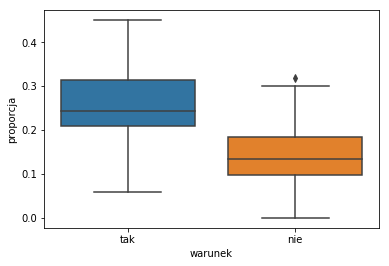

In [64]:
sns.boxplot(x=d2.warunek, y=d2.proporcja)
plt.savefig('boxplot2.png', dpi=150)

# Test t

Test t Studenta odpowiada nam na pytanie, czy istnieją istotne statystycznie różnice pomiędzy średnimi. W tym przypadku udało się wykryć różnice pomiędzy średnimi. Opisując wyniki należy po podaniu wartości śrendnich i odchyleń standardowych napisać coś takiego (oczywiście uzupełnijcie ZZ i ZN).

> Różnice w ZZ pod względem ZN okazały się istotne statystycznie; t = 5,748 ; p < 0,001.

In [65]:
from scipy import stats

In [66]:
res = stats.ttest_ind(d2.loc[d2['warunek'] == 'tak', 'proporcja'],
               d2.loc[d2['warunek'] == 'nie', 'proporcja'])

In [67]:
print('t =', round(res[0], 3), '; p = ', round(res[1], 3))

t = 5.748 ; p =  0.0
